<a href="https://colab.research.google.com/github/AllamElsheikh/Projects/blob/main/8_Concrete_Slump_test_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slump testing
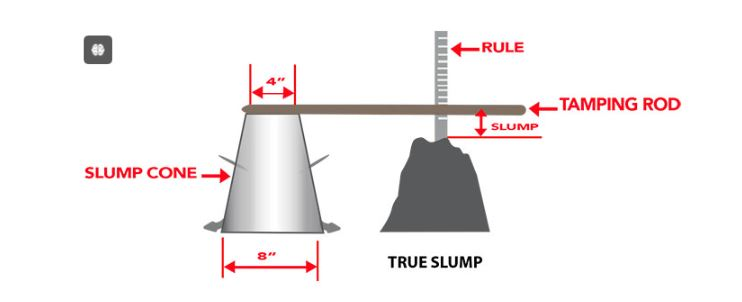

# **Loading the data and checking it .**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train.data')
data.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
data.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
data.isnull().sum()

,0
No,0
Cement,0
Slag,0
Fly ash,0
Water,0
SP,0
Coarse Aggr.,0
Fine Aggr.,0
SLUMP(cm),0
FLOW(cm),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,103.0,52.000000,29.877528,1.00,26.50,52.00,77.500,103.00
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00


In [ ]:
data.corr()['Compressive Strength (28-day)(Mpa)'].sort_values(ascending=False)

,Compressive Strength (28-day)(Mpa)
Compressive Strength (28-day)(Mpa),1.000000
Cement,0.445725
Fly ash,0.444393
No,0.186274
SP,-0.037871
FLOW(cm),-0.124029
Fine Aggr.,-0.154484
Coarse Aggr.,-0.160684
SLUMP(cm),-0.223358
Water,-0.254235


# Analysis

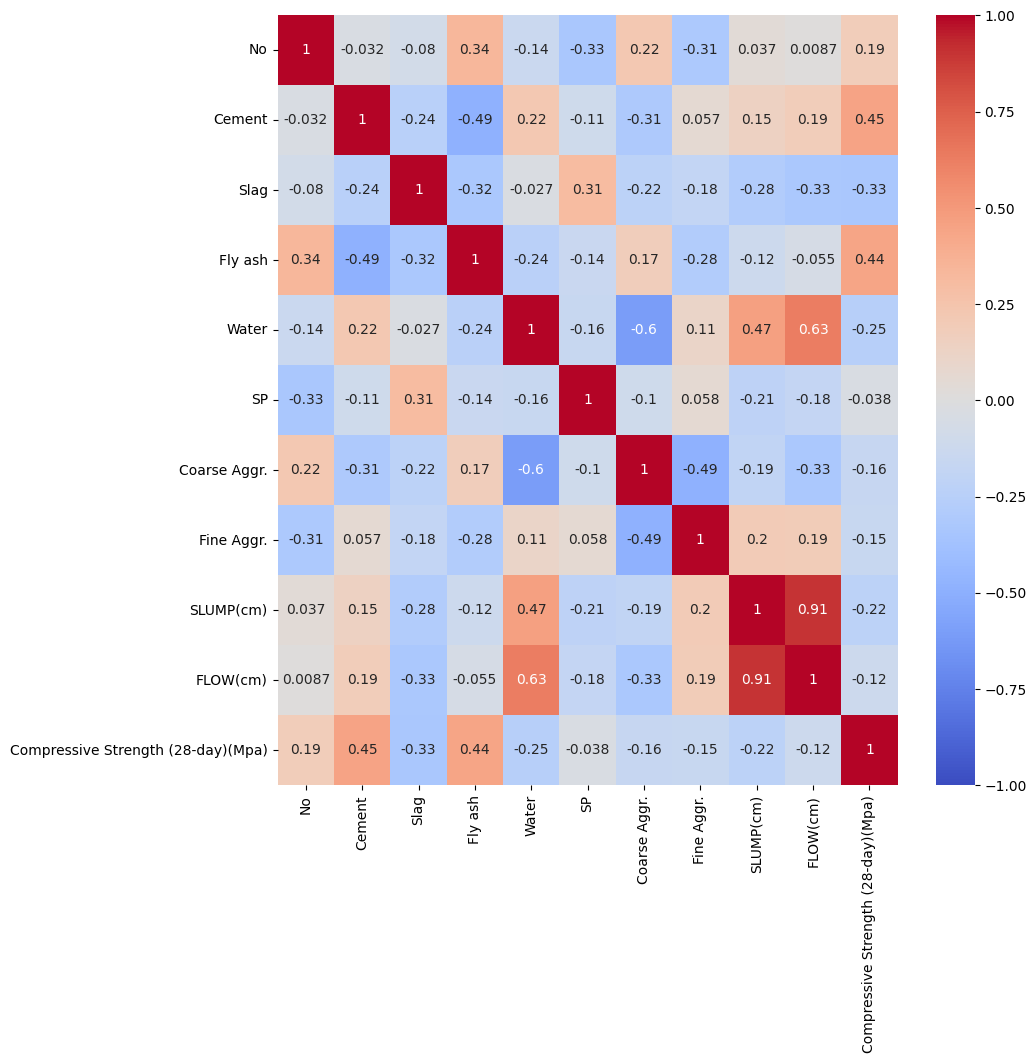

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True , vmin =-1 , vmax=1 , cmap='coolwarm');

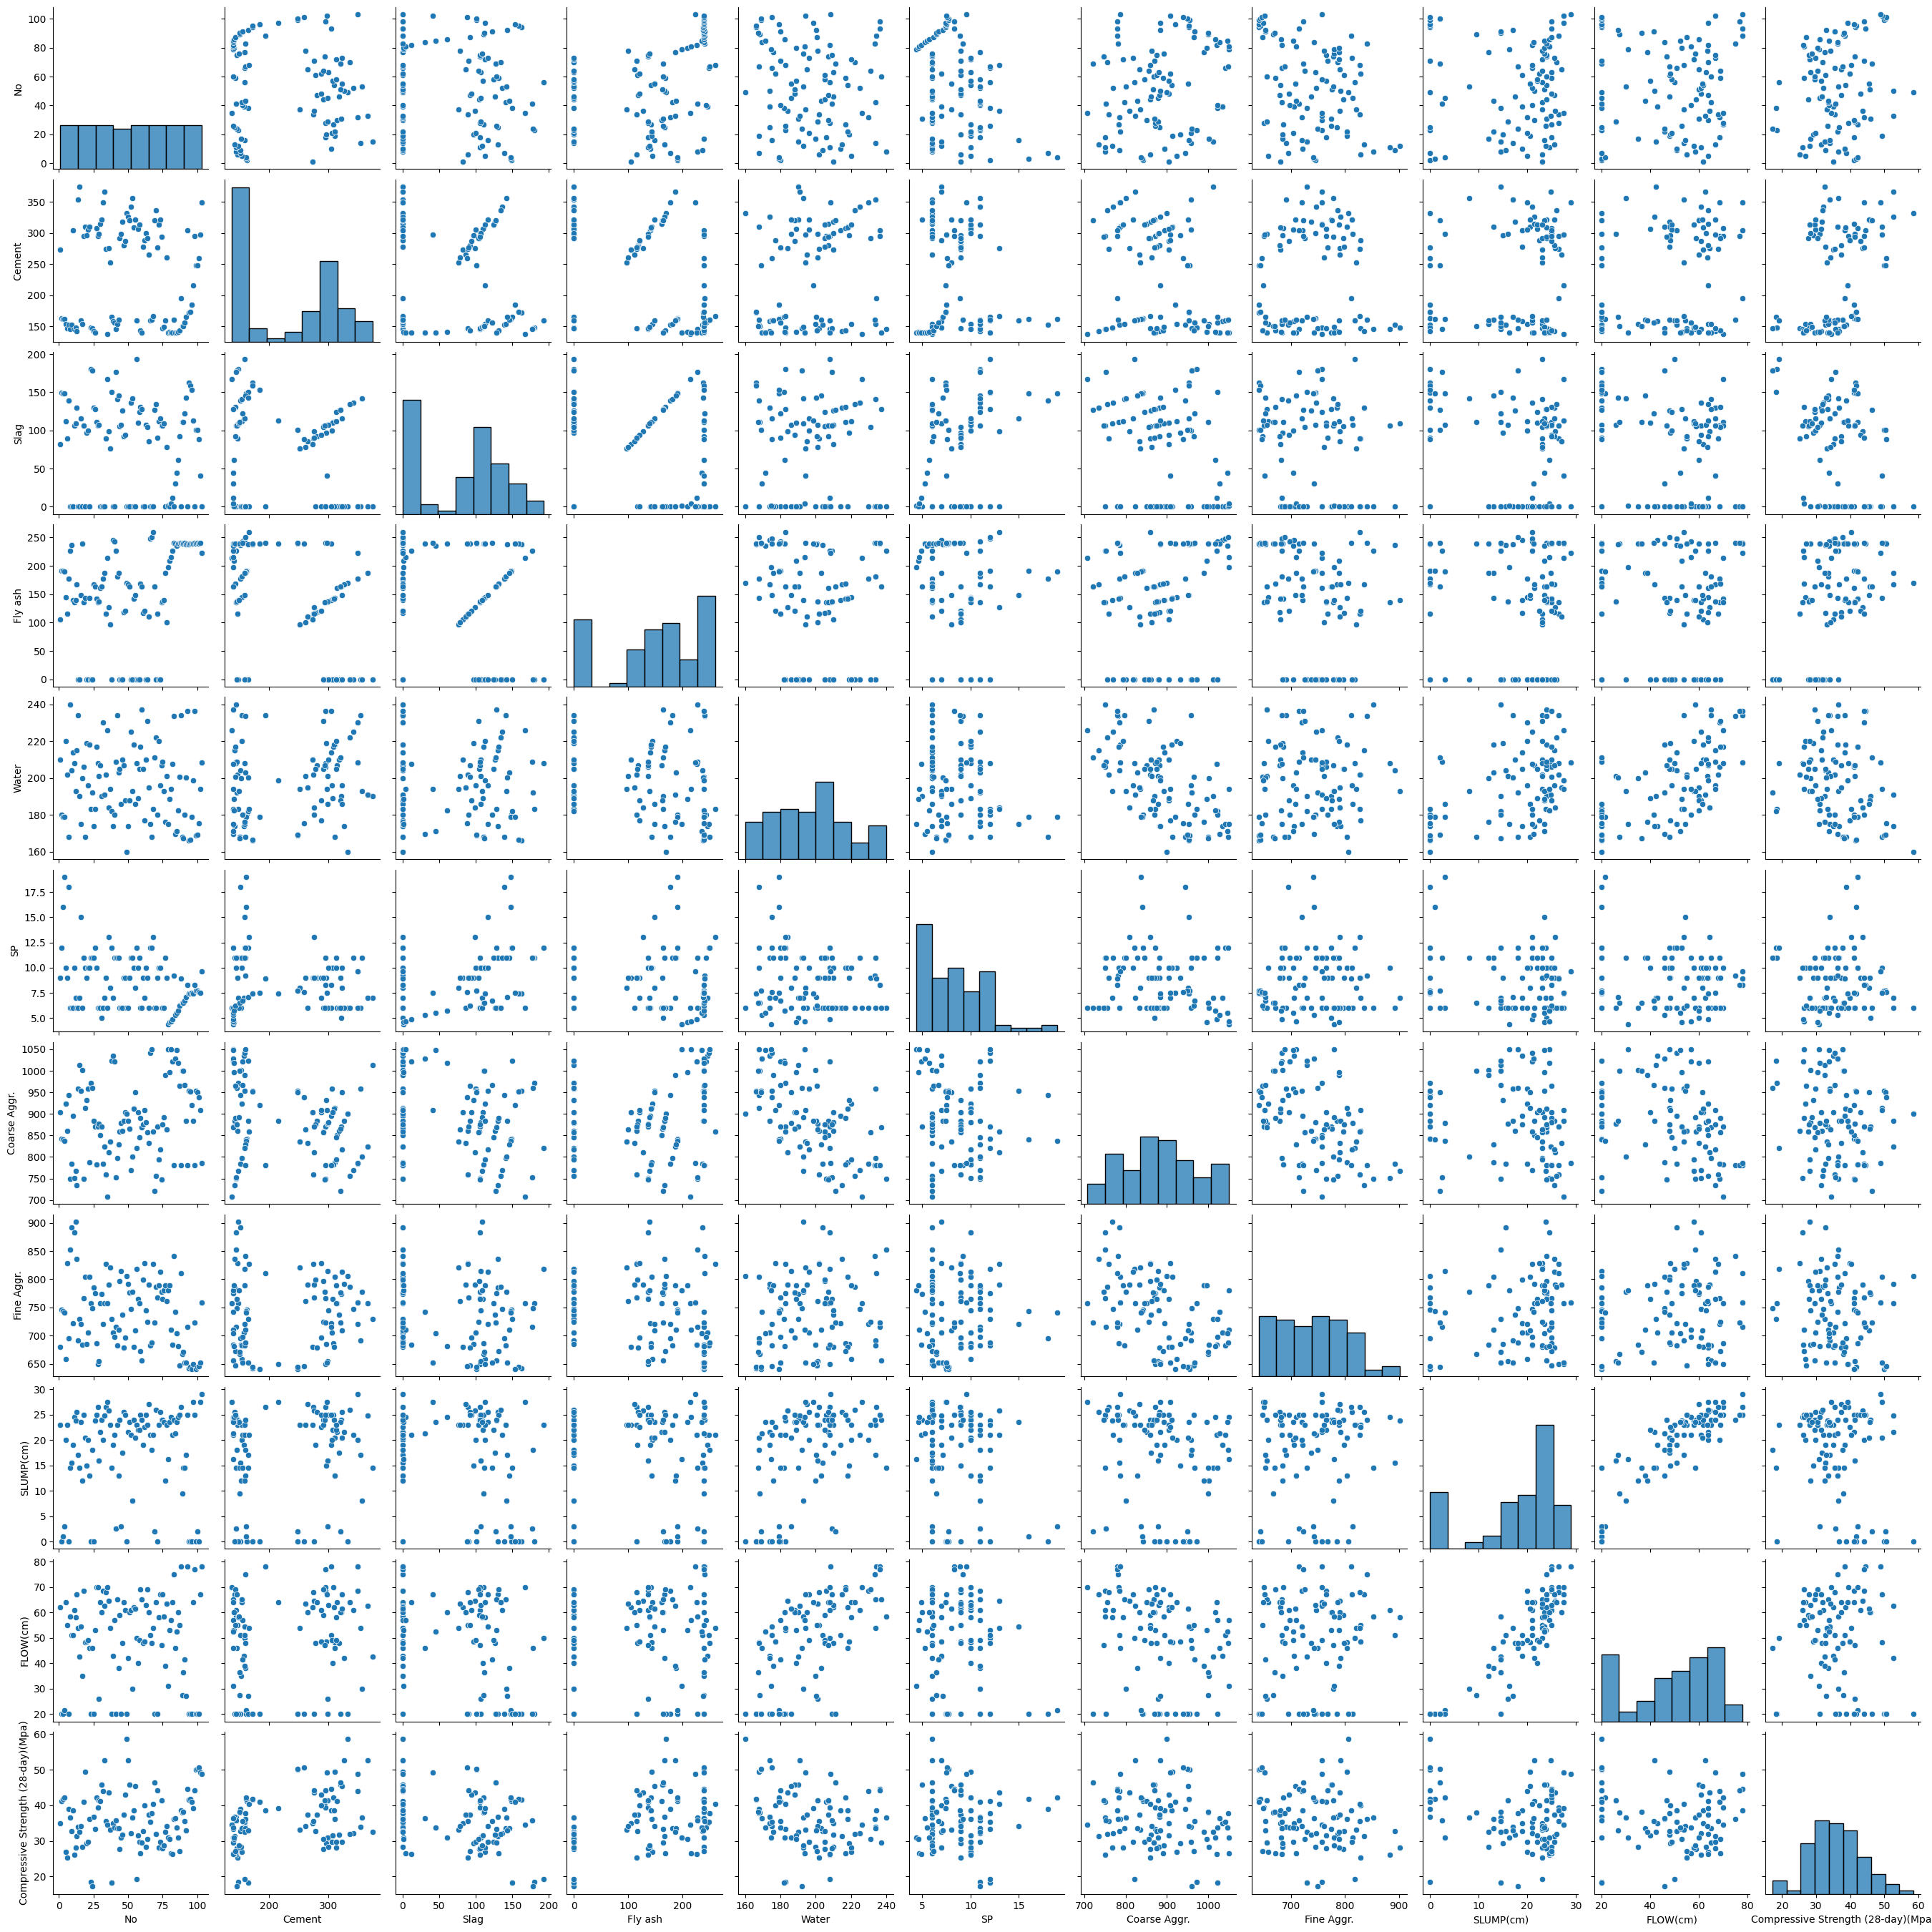

In [ ]:
sns.pairplot(data);

**variance inflantion factor**
 that help us to know the importante columns


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = data['Compressive Strength (28-day)(Mpa)']

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns

pd.DataFrame(vif)

,VIF,Features
0,5.953684,No
1,15.848724,Cement
2,5.120653,Slag
3,7.943613,Fly ash
4,167.860096,Water
5,13.699409,SP
6,63.470539,Coarse Aggr.
7,98.759419,Fine Aggr.
8,39.230000,SLUMP(cm)
9,90.750762,FLOW(cm)


# splitting the data to train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**scalling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error ,  mean_absolute_error , mean_absolute_percentage_error

def scores (y_train , y_train_pred , y_test , y_pred , model_name):
  score = {model_name + "_train" : {"R2 " : r2_score(y_train , y_train_pred) ,
                                    "mse" : mean_squared_error(y_train , y_train_pred)  ,
                                    "mae" : mean_absolute_error(y_train , y_train_pred) ,
                                    "mape" : mean_absolute_percentage_error(y_train , y_train_pred) } ,
           model_name + "_test" : {"R2" : r2_score(y_test , y_pred) ,
                                   "mse" : mean_squared_error(y_test , y_pred) ,
                                   "mae" : mean_absolute_error(y_test , y_pred) ,
                                   "mape" : mean_absolute_percentage_error(y_test , y_pred)}}
  return pd.DataFrame(score)

In [ ]:
lr = scores(y_train , LR.predict(x_train) , y_test , y_pred , "LinearRegression")
lr

,LinearRegression_train,LinearRegression_test
R2,0.907545,NaN
mse,5.851039,4.297758
mae,1.932065,1.673796
mape,0.056156,0.045475
R2,NaN,0.915059


# using cross validation

In [ ]:
from sklearn.model_selection import cross_validate , cross_val_score
cv = cross_validate(LR , x_train , y_train , cv=10 , scoring=[
    'r2',
    'neg_mean_squared_error',
    'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error'] ,
                    return_train_score=True  )

In [ ]:
pd.DataFrame(cv , index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.002580,0.003868,0.947129,0.900065,-3.968553,-6.164415,-1.716795,-1.979394,-0.055060,-0.057244
2,0.001881,0.003208,0.944165,0.899742,-3.940015,-6.169054,-1.822058,-1.952026,-0.055689,-0.056537
3,0.001912,0.003242,0.598385,0.918875,-11.024241,-5.417314,-2.808314,-1.838976,-0.086738,-0.052792
4,0.001749,0.003832,0.678728,0.920273,-14.516867,-5.181166,-3.042327,-1.851144,-0.080256,-0.053905
5,0.001721,0.003075,0.642666,0.913141,-6.682873,-5.913169,-2.030452,-1.916870,-0.059938,-0.056244
6,0.001867,0.003079,0.920337,0.903933,-2.219699,-6.284181,-1.288863,-2.003914,-0.032079,-0.058641
7,0.001867,0.003178,0.906842,0.904084,-11.630860,-5.428157,-2.608657,-1.879395,-0.067908,-0.054716
8,0.001855,0.003131,0.902581,0.904996,-9.218398,-5.681073,-2.284174,-1.886770,-0.073558,-0.054772
9,0.001730,0.003081,0.822497,0.914575,-11.374346,-5.333853,-2.697741,-1.841575,-0.080602,-0.053429
10,0.001795,0.003168,0.854156,0.909443,-6.799956,-5.893217,-2.451633,-1.926342,-0.070503,-0.056130
